## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing dataset
dataset = pd.read_csv("Churn_Modelling.csv")
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [3]:
#creating a dummmy variable
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [4]:
x = pd.concat([x, geography, gender], axis=True)
x = x.drop(['Geography', 'Gender'], axis=True)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Spliting of data

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [6]:
# feature_scalling it is important in dl to do feature scalling so that caluations will be faster during both front and back 
# propogation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Creating ANN

In [8]:
import keras
from keras.models import Sequential # for any dl model let it be ANN, CNN we have to import it
from keras.layers import Dropout
from keras.layers import Dense
# from keras.layers import LeakyReLU, ELU

In [19]:
#initialsing the ann
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu', input_dim=11))
classifier.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))

#compliing neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## fiting the model to train data

In [20]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=100)
print(model_history.history.keys())

Epoch 1/100
536/536 [==============================] - 6s 6ms/step - loss: 0.6772 - accuracy: 0.6177 - val_loss: 0.5196 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4934 - accuracy: 0.7962 - val_loss: 0.4816 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4616 - accuracy: 0.7955 - val_loss: 0.4597 - val_accuracy: 0.7940
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4395 - accuracy: 0.8048 - val_loss: 0.4410 - val_accuracy: 0.8050
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4240 - accuracy: 0.8155 - val_loss: 0.4298 - val_accuracy: 0.8126
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4138 - accuracy: 0.8173 - val_loss: 0.4230 - val_accuracy: 0.8198
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4057 - accuracy: 0.8248 - val_loss: 0.4157 - val_accuracy: 0.8217

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3260 - accuracy: 0.8636 - val_loss: 0.3527 - val_accuracy: 0.8588
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3255 - accuracy: 0.8651 - val_loss: 0.3532 - val_accuracy: 0.8576
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3254 - accuracy: 0.8655 - val_loss: 0.3541 - val_accuracy: 0.8588
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3254 - accuracy: 0.8627 - val_loss: 0.3527 - val_accuracy: 0.8573
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3253 - accuracy: 0.8645 - val_loss: 0.3531 - val_accuracy: 0.8603
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8634 - val_loss: 0.3531 - val_accuracy: 0.8580
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3252 - accuracy: 0.8649 - val_loss: 0.3533 - val_accuracy:

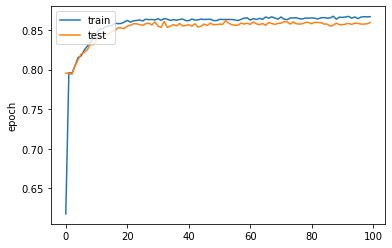

In [21]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## predicting it on test data

In [22]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [24]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1519   76]
 [ 201  204]]


In [26]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
acc_s = accuracy_score(y_test, y_pred)
print(acc_s)

0.8615
